# Trajectory reconstruction from  synthetic scRNA-Seq data of the hematopoiesis network

We analyse the synthetic scRNA-Seq data generated by scBoolSeq from the Boolean simulations of the hematopoiesis network in [2.4 - synthetic scRNA-Seq from hematopoiesis network](2.4%20-%20synthetic%20scRNA-Seq%20from%20hematopoiesis%20network.ipynb).

⚠️ This notebook must be run in a STREAM environment

In [1]:
import pandas as pd
import stream as st
st.__version__

/opt/conda/lib/python3.7/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/opt/conda/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


'1.0'

In [2]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

#### Read in data

In [3]:
in_file = 'synthetic_data_hematopoiesis_counts.tsv'

adata = st.read(
    file_name=in_file,
    workdir='./stream_branching'
)
df = pd.read_csv(
    in_file, sep="\t", index_col=0, header=0
)
df

Saving results in: ./stream_branching


,init_0,init_1,init_2,init_3,init_4,init_5,init_6,init_7,init_8,init_9,...,pMk_520,pMk_521,pMk_522,pMk_523,pMk_524,pMk_525,pMk_526,pMk_527,pMk_528,pMk_529
Bclaf1,7.272742,9.379227,8.758629,7.751030,7.048156,8.296139,8.813780,6.797171,4.305499,9.371849,...,0.000000,1.794161,2.480292,2.822274,4.559291,1.510117,1.920005,0.000000,3.578068,2.921943
CDK46CycD,3.072821,2.376855,3.216206,4.050580,2.626252,1.541604,2.912694,4.461553,2.196429,1.207510,...,2.259006,2.543449,1.921451,2.012640,3.188427,0.020060,2.199807,4.641946,4.628962,2.293568
CIPKIP,2.934519,1.156308,3.046133,1.581995,3.033596,2.267470,2.629758,2.176917,2.659071,1.643102,...,3.223458,2.880789,5.283948,1.649450,3.046163,1.066910,2.632398,0.909853,2.306841,1.238616
Cebpa,2.567695,4.325819,3.298777,3.131279,2.893697,2.254733,0.000000,3.302085,2.794024,2.123338,...,1.535263,2.273820,3.545786,0.361498,3.971452,1.254402,0.767549,4.823950,1.976418,4.752655
Egr1,3.259322,3.084068,4.463747,1.687493,2.338154,4.385627,4.925733,2.361570,2.330403,2.700307,...,3.101418,4.739186,3.518701,4.751537,3.736657,1.014852,4.747743,5.072551,1.067303,3.633193
Fli1,5.422549,5.812863,3.847351,7.572249,5.663830,9.169510,6.315921,7.410461,6.535440,7.467862,...,7.395122,8.951521,8.864594,7.923627,8.133228,7.484866,8.461331,8.708967,6.478584,8.695147
Gata1,2.629122,0.882373,3.141744,3.250772,3.684135,4.284193,2.549797,5.841266,2.658573,3.775216,...,11.620614,9.281423,8.285492,7.471640,5.245600,6.820082,8.275822,7.288631,9.248307,7.407549
Gata2,7.000062,7.408340,5.501506,6.161751,7.976371,7.084937,7.197575,6.982738,8.140840,5.279480,...,0.453554,3.776612,2.791647,3.819922,2.655858,2.535112,2.539642,3.069511,3.107376,2.718347
Ikzf1,0.000000,3.165181,4.389592,3.724161,1.823105,0.468249,2.542953,3.449330,2.615833,3.074646,...,3.666437,2.161587,1.534652,1.300342,3.072257,2.072533,2.498187,1.151833,1.314972,0.735436
Junb,1.870571,1.207526,3.528886,2.012807,2.077562,3.133246,2.426341,1.368990,3.113761,0.712288,...,0.471737,2.212647,1.833387,0.311705,0.311502,2.271591,0.000000,0.711935,3.554562,1.698173


In [4]:
adata

AnnData object with n_obs × n_vars = 4565 × 15 
    uns: 'workdir'

#### Read in metadata

In [5]:
st.add_metadata(
    adata, 
    file_name='synthetic_data_hematopoiesis_metadata.tsv'
)
adata.obs.head()

,label,label_color
init_0,init,#550000
init_1,init,#550000
init_2,init,#550000
init_3,init,#550000
init_4,init,#550000


In [6]:
adata.obs.label.value_counts()

branch2     1159
common      1038
branch1      890
pNeumast     596
pMk          530
init         184
switch       168
Name: label, dtype: int64

#### Feature selection

Please check if the blue curve fits the points well. If not, please adjust the parameter **'loess_frac'** (usually by lowering it) until the blue curve fits well. 

15 variable genes are selected


Index(['Cebpa', 'Tal1', 'Zfpm1', 'Gata2', 'Myc', 'Klf1', 'Junb', 'Ikzf1',
       'Gata1', 'Egr1', 'CIPKIP', 'CDK46CycD', 'Bclaf1', 'Spi1', 'Fli1'],
      dtype='object')

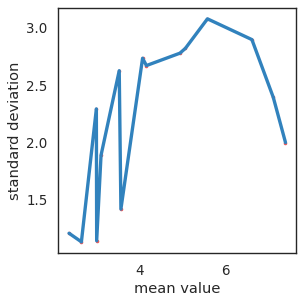

In [7]:
st.select_variable_genes(adata,loess_frac=0.2,n_genes=15)
adata.uns["var_genes"]

**Alternatively, user can also select top  principal components using all genes or variable genes:**
- use all genes   
`st.select_top_principal_components(adata,n_pc=15,first_pc=True)`
- use variable genes   
    - users need to first run `st.select_variable_genes(adata,loess_frac=0.01, n_genes=2000)`  
    - `st.select_top_principal_components(adata,feature='var_genes',n_pc=40,first_pc=True)`

#### Dimension reduction

feature var_genes is being used ...
8 cpus are being used ...


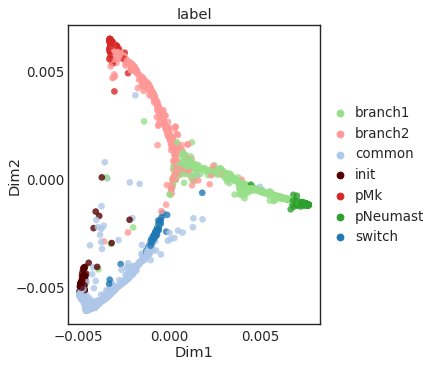

In [8]:
st.dimension_reduction(
    adata,
    method='se',  # se, mlle, umap, pca
    feature='var_genes', # top_pcs
    n_components=2,
    n_neighbors=15,
    n_jobs=8
)
st.plot_dimension_reduction(adata,color=['label'],
                 n_components=2,show_graph=False,show_text=False)

> **Alternatively, using top principal components as features:**
`st.dimension_reduction(adata,method='se',feature='top_pcs',n_neighbors=15, n_components=2)`

#### Trajectory inference

In [9]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


In [10]:
df.head()

,init_0,init_1,init_2,init_3,init_4,init_5,init_6,init_7,init_8,init_9,...,pMk_520,pMk_521,pMk_522,pMk_523,pMk_524,pMk_525,pMk_526,pMk_527,pMk_528,pMk_529
Bclaf1,7.272742,9.379227,8.758629,7.751030,7.048156,8.296139,8.813780,6.797171,4.305499,9.371849,...,0.000000,1.794161,2.480292,2.822274,4.559291,1.510117,1.920005,0.000000,3.578068,2.921943
CDK46CycD,3.072821,2.376855,3.216206,4.050580,2.626252,1.541604,2.912694,4.461553,2.196429,1.207510,...,2.259006,2.543449,1.921451,2.012640,3.188427,0.020060,2.199807,4.641946,4.628962,2.293568
CIPKIP,2.934519,1.156308,3.046133,1.581995,3.033596,2.267470,2.629758,2.176917,2.659071,1.643102,...,3.223458,2.880789,5.283948,1.649450,3.046163,1.066910,2.632398,0.909853,2.306841,1.238616
Cebpa,2.567695,4.325819,3.298777,3.131279,2.893697,2.254733,0.000000,3.302085,2.794024,2.123338,...,1.535263,2.273820,3.545786,0.361498,3.971452,1.254402,0.767549,4.823950,1.976418,4.752655
Egr1,3.259322,3.084068,4.463747,1.687493,2.338154,4.385627,4.925733,2.361570,2.330403,2.700307,...,3.101418,4.739186,3.518701,4.751537,3.736657,1.014852,4.747743,5.072551,1.067303,3.633193


`n_components` is greater than the available dimension. It is corrected to 2


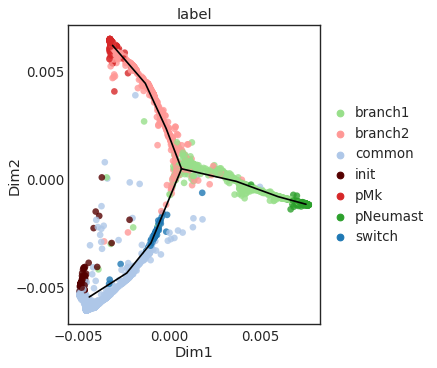

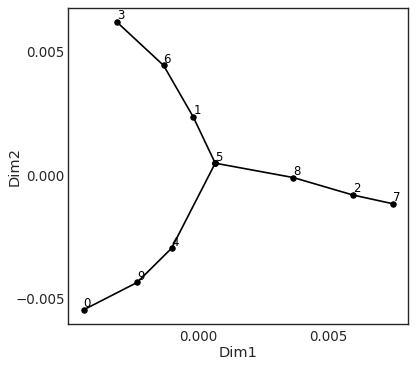

In [11]:
st.plot_dimension_reduction(adata,color=['label'],n_components=3,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

**`epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.**  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

> **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [12]:
st.elastic_principal_graph(adata,epg_alpha=0.05,epg_mu=0.1,epg_lambda=0.03)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 4565 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
4.391e-07
	
50
	
49
	
46
	
1
	
0
	
0
	
9.818e-08
	
8.776e-08
	
0.9968
	
0.9972
	
3.201e-07
	
2.084e-08
	
1.042e-06
	
5.211e-05
	
0


29.624 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


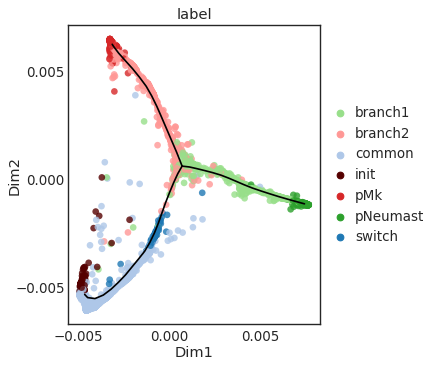

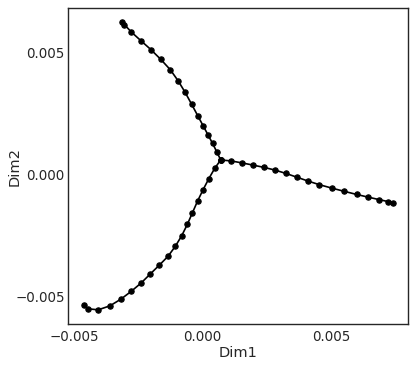

In [13]:
st.plot_dimension_reduction(adata,color=['label'],show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

#### Adjusting trajectories (optional)

* Finetune branching event:  
```python
st.optimize_branching(adata,incr_n_nodes=30)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```
* Prune trivial branches:  
```python
st.prune_elastic_principal_graph(adata,epg_collapse_mode='EdgesNumber',epg_collapse_par=2)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

* Shift branching node:  
```python
st.shift_branching(adata,epg_shift_mode='NodeDensity',epg_shift_radius=0.1,epg_shift_max=3)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

Extending leaves with additional nodes ...
Number of branches after extending leaves: 3


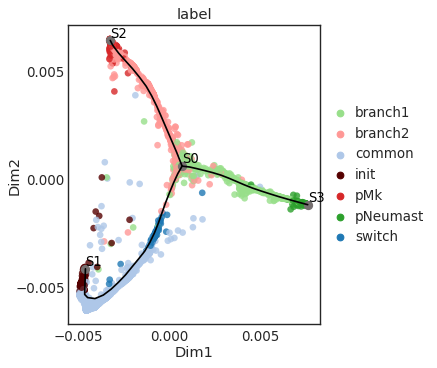

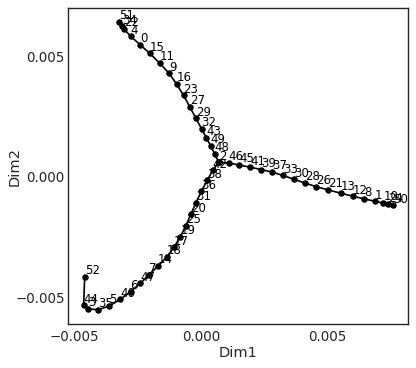

In [14]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

#### Trajectory visualization

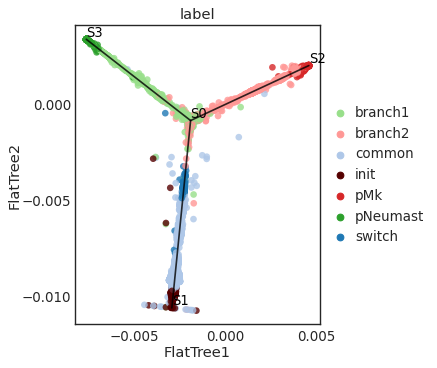

In [15]:
st.plot_flat_tree(adata,color=['label'],  dist_scale=0.5,show_graph=True,show_text=True)

##### stream plot at single cell level

In [16]:
root = "S1"

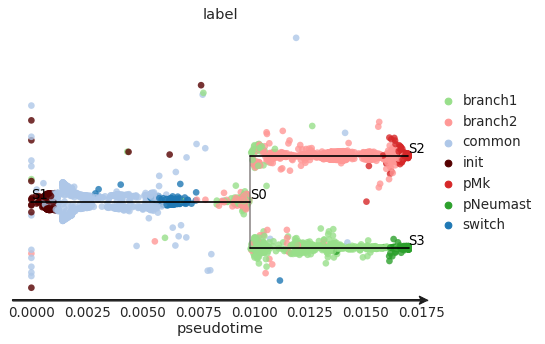

In [17]:
st.plot_stream_sc(adata,root=root,color=['label'],
                  dist_scale=0.3,show_graph=True,show_text=True)

##### stream plots

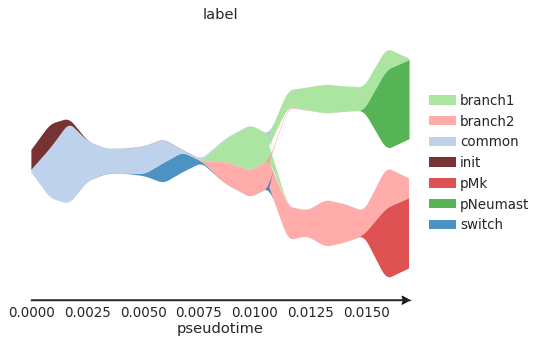

In [19]:
st.plot_stream(adata,root=root,color=['label'], preference=["S3", "S2"])

#### Marker genes detection

`marker_list` defines the list of genes to scan. If not specified, by default it uses all available genes. It might be time-consuming.  

Here we only include variable genes.

##### 1) detect marker genes for each leaf branch

In [24]:
st.detect_leaf_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S2',n_jobs=10)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...
10 cpus are being used ...
12 markers are being scanned ...


In [25]:
adata.uns['leaf_markers_all'].head()

,zscore,H_statistic,H_pvalue,S2S0_pvalue,S0S1_pvalue,S0S3_pvalue
TF2,1.4141,2906.91,0,0,0,1
G3,1.41406,1514.48,0,6.50185e-300,1,0
G4,1.41398,1544.78,0,1.46125e-287,0,1
TF1,1.41304,2932.17,0,0,1,0
TF3,-1.41414,2533.73,0,1,0,0


In [26]:
for _key in adata.uns['leaf_markers'].keys():
    print(_key)
    print(adata.uns['leaf_markers'][_key], end="\n\n")

('S2', 'S0')
      zscore H_statistic      H_pvalue S2S0_pvalue   S0S1_pvalue   S0S3_pvalue
TF3 -1.41414     2533.73             0           1             0             0
TF4  -1.4142     912.473  7.22875e-199           1  5.24149e-177  3.07439e-176
TF5 -1.41355     235.984   5.71214e-52           1    8.3418e-41   1.73818e-44

('S0', 'S1')
      zscore H_statistic      H_pvalue   S2S0_pvalue S0S1_pvalue  S0S3_pvalue
G3   1.41406     1514.48             0  6.50185e-300           1            0
TF1  1.41304     2932.17             0             0           1            0
G1   1.41419      724.51  4.72827e-158  1.41714e-121           1   2.054e-137
G2   1.41421     166.951   5.58437e-37   4.22636e-27           1  2.45897e-30

('S0', 'S3')
      zscore H_statistic      H_pvalue   S2S0_pvalue  S0S1_pvalue S0S3_pvalue
TF2   1.4141     2906.91             0             0            0           1
G4   1.41398     1544.78             0  1.46125e-287            0           1
G6   1.41419     61

##### 2) detect transition genes for each branch

In [27]:
st.detect_transition_markers(adata,marker_list=adata.uns['var_genes'],cutoff_spearman=0.4,cutoff_logfc=0.25,
                             root='S2',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
12 markers are being scanned ...


In [28]:
for _key in adata.uns['transition_markers'].keys():
    print(f"Transition {_key}")
    print(adata.uns['transition_markers'][_key].head(), end="\n\n")

Transition ('S2', 'S0')
         stat     logfc           pval           qval
TF4  0.631633  1.125965  1.206463e-153  7.238776e-153
TF5  0.597190  1.649488  2.236543e-133  6.709630e-133

Transition ('S0', 'S1')
        stat     logfc           pval           qval
G1  0.711753  1.434843  1.910995e-266  7.643979e-266
G3  0.640953  1.500323  4.570756e-200  9.141512e-200
G2  0.504105  1.559709  8.864625e-112  1.181950e-111

Transition ('S0', 'S3')
        stat     logfc           pval           qval
G6  0.698724  1.504524  7.507086e-250  3.002834e-249
G4  0.634464  1.357060  1.316182e-192  2.632364e-192
G5  0.480718  1.491464   3.048188e-99   4.064250e-99



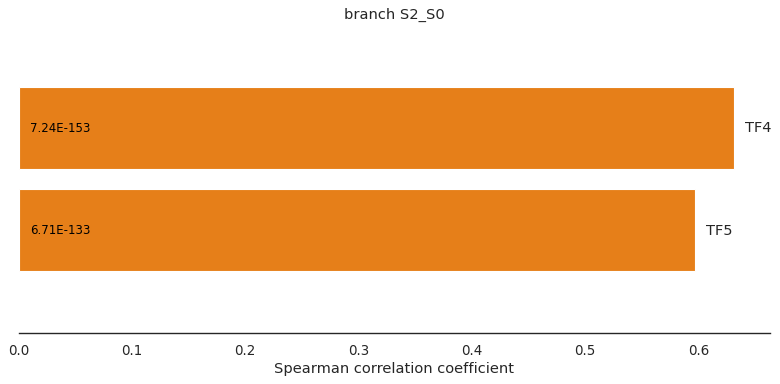

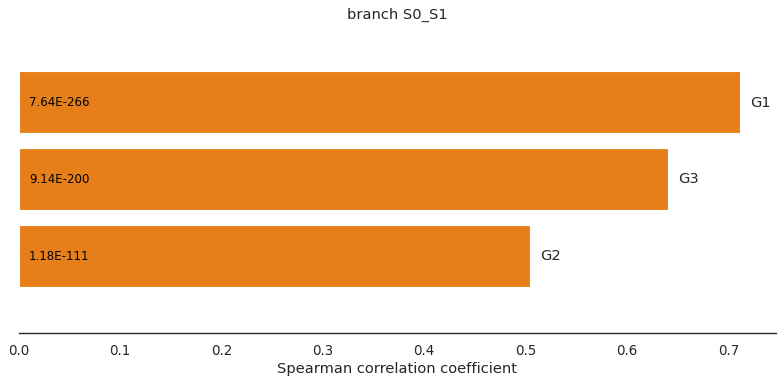

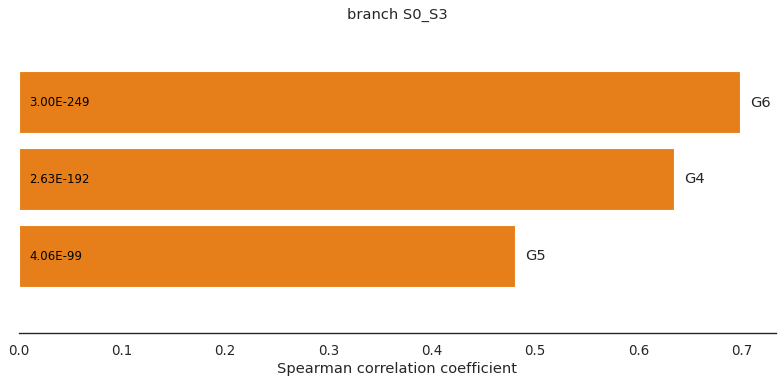

In [29]:
st.plot_transition_markers(adata,fig_size=(10,5))

##### 3) detect marker genes that are differentially expressed between pairs of branches

In [30]:
st.detect_de_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1,cutoff_logfc=0.25,
                     root='S2',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
12 markers are being scanned ...


In [31]:
for _key in adata.uns['de_markers_greater'].keys():
    print(f"Differential expression between branches {_key[0]} and {_key[1]} are :")
    print(adata.uns["de_markers_greater"][_key], end="\n\n")

Differential expression between branches ('S2', 'S0') and ('S0', 'S1') are :
Empty DataFrame
Columns: [z_score, U, logfc, mean_up, mean_down, pval, qval]
Index: []

Differential expression between branches ('S2', 'S0') and ('S0', 'S3') are :
Empty DataFrame
Columns: [z_score, U, logfc, mean_up, mean_down, pval, qval]
Index: []

Differential expression between branches ('S0', 'S1') and ('S0', 'S3') are :
       z_score          U     logfc   mean_up  mean_down           pval  \
TF1  48.174804  2864396.0  1.968144  0.798509   0.203489   0.000000e+00   
G3   34.062536  2455569.0  1.353760  0.660347   0.257972  2.648935e-254   
G1   23.779161  2157690.5  0.967570  0.570712   0.291564  5.490030e-125   
G2   11.412117  1799439.0  0.525046  0.471267   0.327357   3.638384e-30   

              qval  
TF1   0.000000e+00  
G3   5.297869e-254  
G1   8.784049e-125  
G2    3.638384e-30  



In [32]:
for _key in adata.uns['de_markers_less'].keys():
    print(f"Differential expression between branches {_key[0]} and {_key[1]} are :")
    print(adata.uns["de_markers_less"][_key], end="\n\n")

Differential expression between branches ('S2', 'S0') and ('S0', 'S1') are :
       z_score         U     logfc   mean_up  mean_down           pval  \
TF3 -44.635007   80011.0  1.663375  0.250997   0.796780   0.000000e+00   
TF1 -44.295073   88486.5  1.786814  0.230849   0.798509   0.000000e+00   
G3  -32.585589  377746.0  1.393075  0.251019   0.660347  6.567057e-233   
TF4 -26.791764  520745.0  0.626739  0.508468   0.785539  4.032623e-158   
G1  -22.300121  631812.0  0.957836  0.293541   0.570712  3.686673e-110   
TF5 -13.231256  855772.0  0.288200  0.660210   0.806371   5.792728e-40   
G2  -10.708358  918148.5  0.523337  0.327746   0.471267   9.301704e-27   

              qval  
TF3   0.000000e+00  
TF1   0.000000e+00  
G3   1.532313e-232  
TF4  7.057091e-158  
G1   5.161343e-110  
TF5   6.758182e-40  
G2    9.301704e-27  

Differential expression between branches ('S2', 'S0') and ('S0', 'S3') are :
       z_score         U     logfc   mean_up  mean_down           pval  \
TF2 -44.27

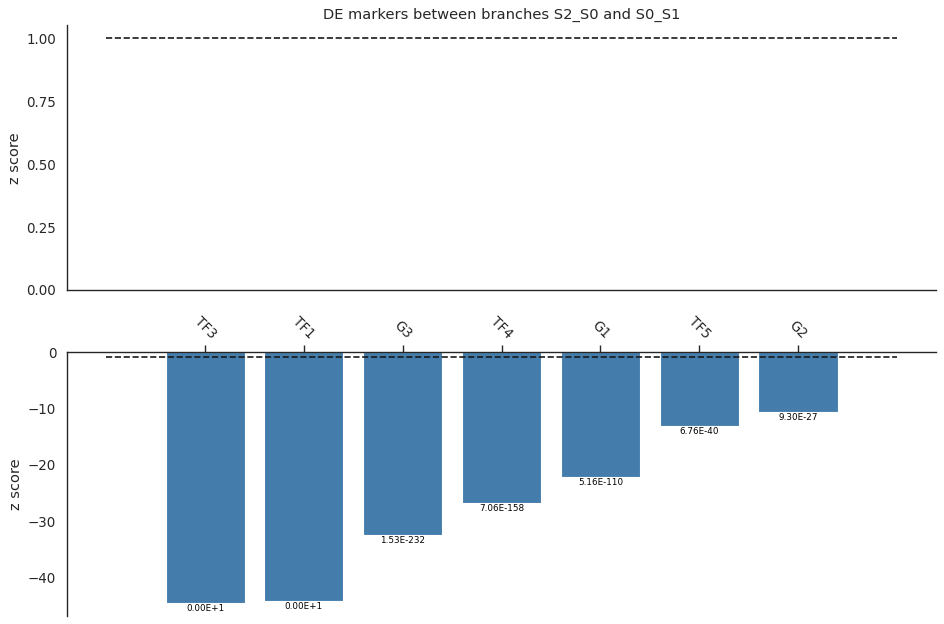

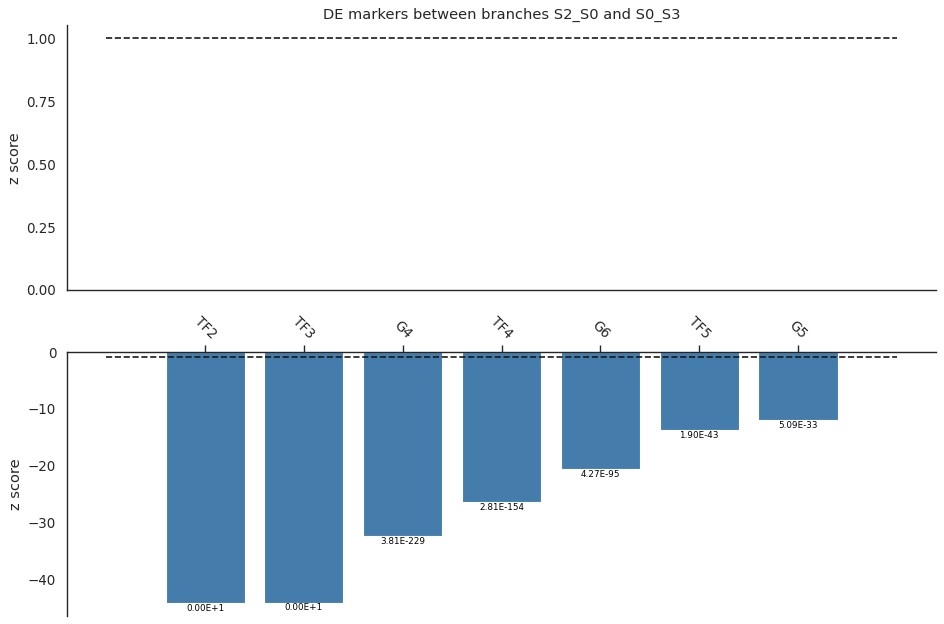

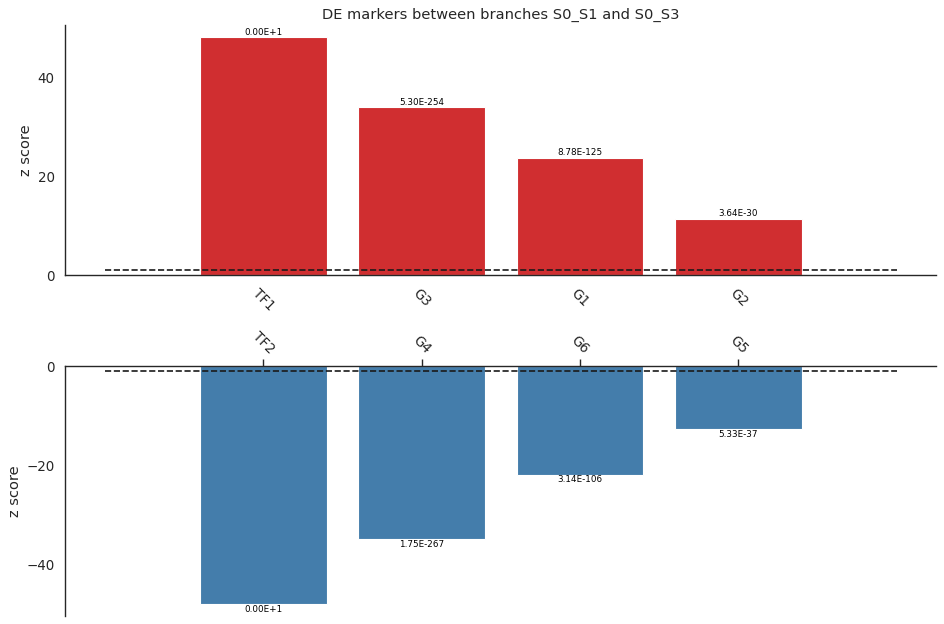

In [33]:
st.plot_de_markers(adata)

##### 4) detect cell population-specific markers

```python
st.detect_markers(adata,ident='label',marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01)
```

In [34]:
st.detect_markers(
    adata,
    ident='label',
    marker_list=adata.uns['var_genes'],
    cutoff_zscore=1.0,
    cutoff_pvalue=0.01
)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
12 markers are being scanned ...


In [35]:
adata.uns["markers_label"].keys()

dict_keys(['branch1', 'branch2', 'common', 'stable1', 'stable2', 'switch'])

In [36]:
for key in adata.uns["markers_label"].keys():
    print(f"Detected population-specific markers for `{key}`")
    print(f"\t{adata.uns['markers_label'][key].index.to_list()}")

Detected population-specific markers for `branch1`
	[]
Detected population-specific markers for `branch2`
	[]
Detected population-specific markers for `common`
	['TF3', 'TF4', 'TF5']
Detected population-specific markers for `stable1`
	['G3', 'G1', 'G2']
Detected population-specific markers for `stable2`
	['G4', 'G5', 'G6']
Detected population-specific markers for `switch`
	[]


#### Save results

In [37]:
st.write(adata,file_name='stream_bifurcation_core_regulation1.pkl')

To read back the saved `.pkl` file
```python
adata = st.read('./stream_result/stream_result.pkl')
```